# Auditoría 3: Estudio de la Demanda

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib.dates as mdates

from pyspark import SparkContext, SQLContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

sqlCtx = SQLContext(sc)

## Estudio Demanda General

### 1. Carga de los Datos

##### Demanda por linea general: Cargamos los datos para las lineas 1 y N1 

In [8]:
# Carga de los datos para la linea 1
df_demanda_media_linea1=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=1 group by tramo,fecha")

# Carga de los datos para la linea N1
df_demanda_media_lineaN1=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=501 group by tramo,fecha")


In [9]:
# Guardamos las tablas para realizar querys sobre ellas
sqlCtx.registerDataFrameAsTable(df_demanda_media_linea1, "temporal_demanda_media_linea1")
sqlCtx.registerDataFrameAsTable(df_demanda_media_lineaN1, "temporal_demanda_media_lineaN1")

In [10]:
df_demanda_media_linea1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_media_linea1 group by fecha ORDER BY fecha")
df_demanda_media_lineaN1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_media_lineaN1 group by fecha ORDER BY fecha")

### 2. Plot de la Demanda

In [11]:
# Linea 1
f_1 = [int(i.fecha) for i in df_demanda_media_linea1.select('fecha').collect()]
avg_nbus_1 = [float(i.avg_nbus) for i in df_demanda_media_linea1.select('avg_nbus').collect()]
m_1 = map(str,f_1)

# Linea N1
f_N1 = [int(i.fecha) for i in df_demanda_media_lineaN1.select('fecha').collect()]
avg_nbus_N1 = [float(i.avg_nbus) for i in df_demanda_media_lineaN1.select('avg_nbus').collect()]
m_N1 = map(str,f_N1)

#### 2.1. Demanda media por bus

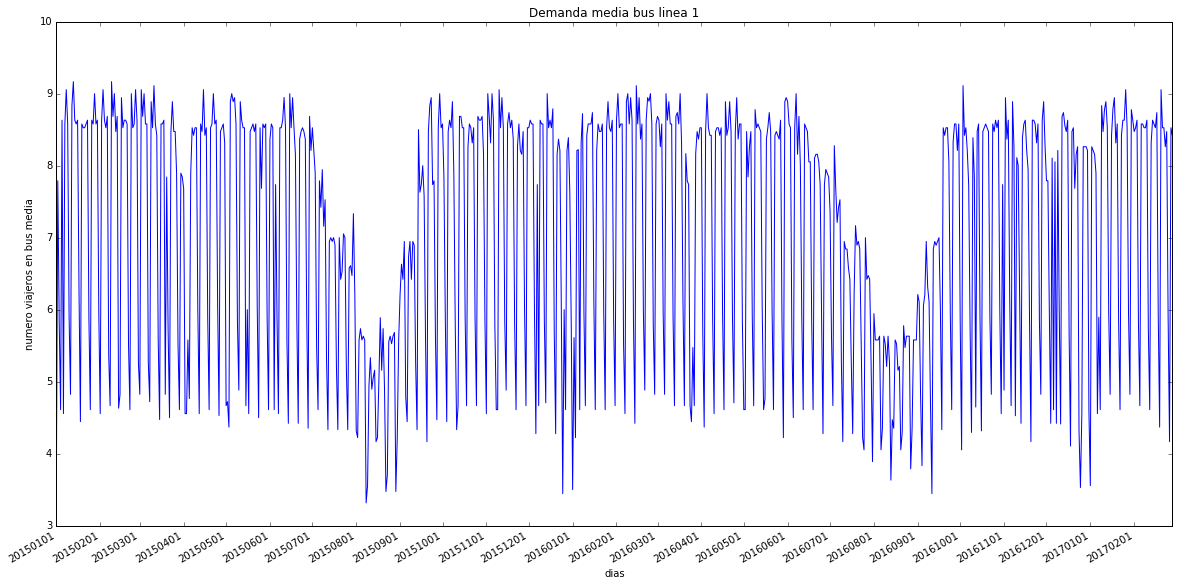

In [12]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nbus_1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus linea 1')

plt.xlabel('dias')
plt.ylabel('numero viajeros en bus media')

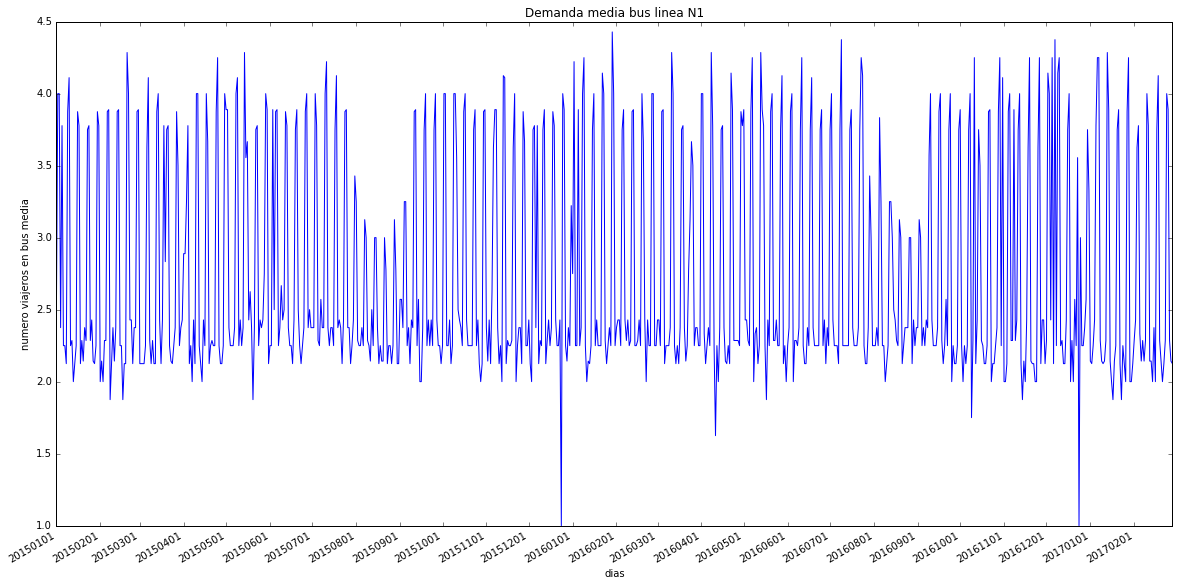

In [13]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_N1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nbus_N1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus linea N1')

plt.xlabel('dias')
plt.ylabel('numero viajeros en bus media')

#### 2.2. Demanda media de viajeros

In [14]:
# Demanda media de viajeros para cada linea
avg_nviajeros_1 = [float(i.avg_nviajeros) for i in df_demanda_media_linea1.select('avg_nviajeros').collect()]
avg_nviajeros_N1 = [float(i.avg_nviajeros) for i in df_demanda_media_lineaN1.select('avg_nviajeros').collect()]

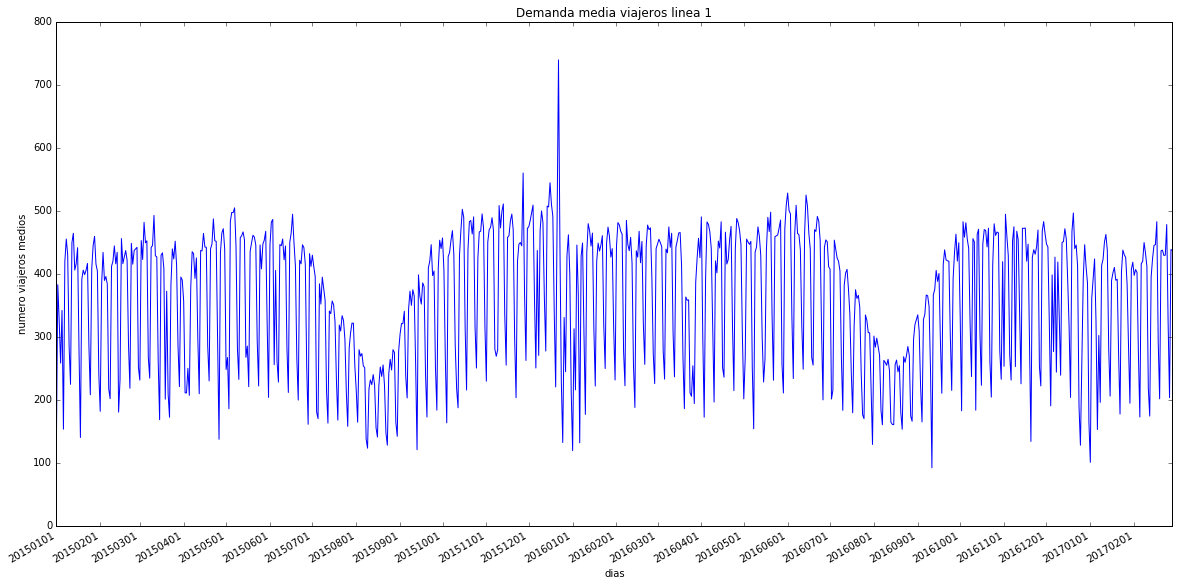

In [15]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nviajeros_1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media viajeros linea 1')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

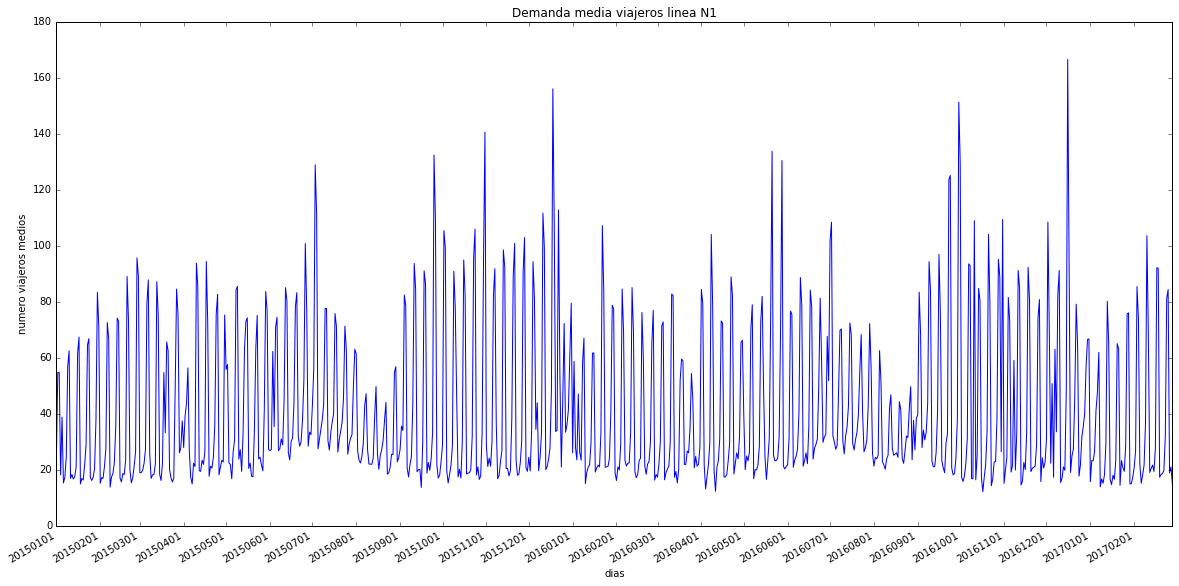

In [16]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_N1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nviajeros_N1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media viajeros linea N1')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

#### 2.3. Demanda media por bus normalizada

In [17]:
# Demanda Normalizada por los viajeros medios
new_demanda_1 = [float(i.new_demanda) for i in df_demanda_media_linea1.select('new_demanda').collect()]
new_demanda_N1 = [float(i.new_demanda) for i in df_demanda_media_lineaN1.select('new_demanda').collect()]

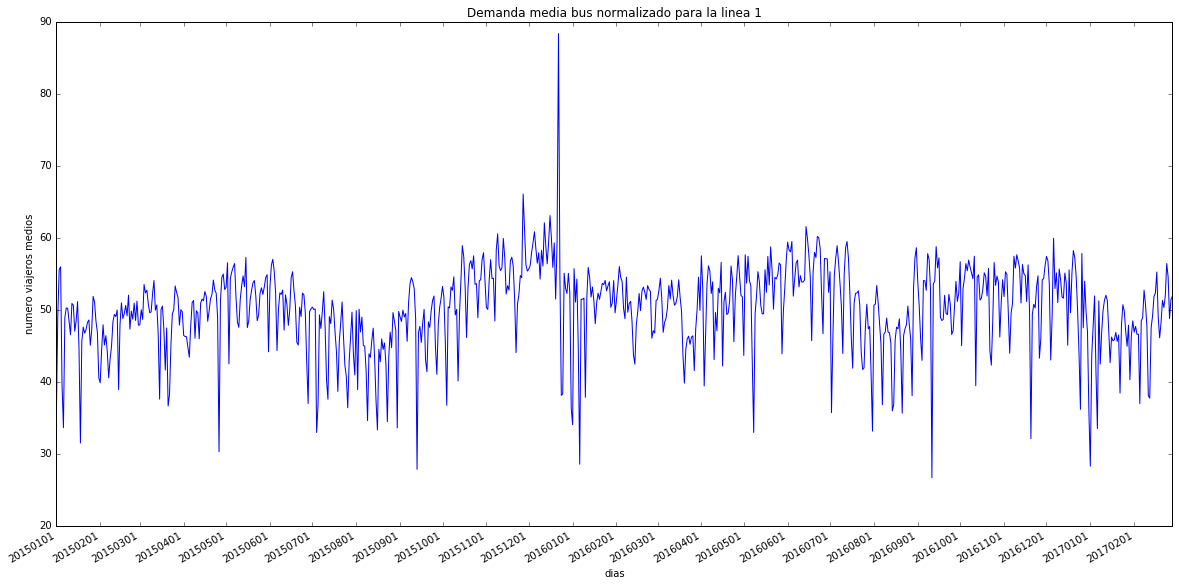

In [18]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,new_demanda_1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus normalizado para la linea 1')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

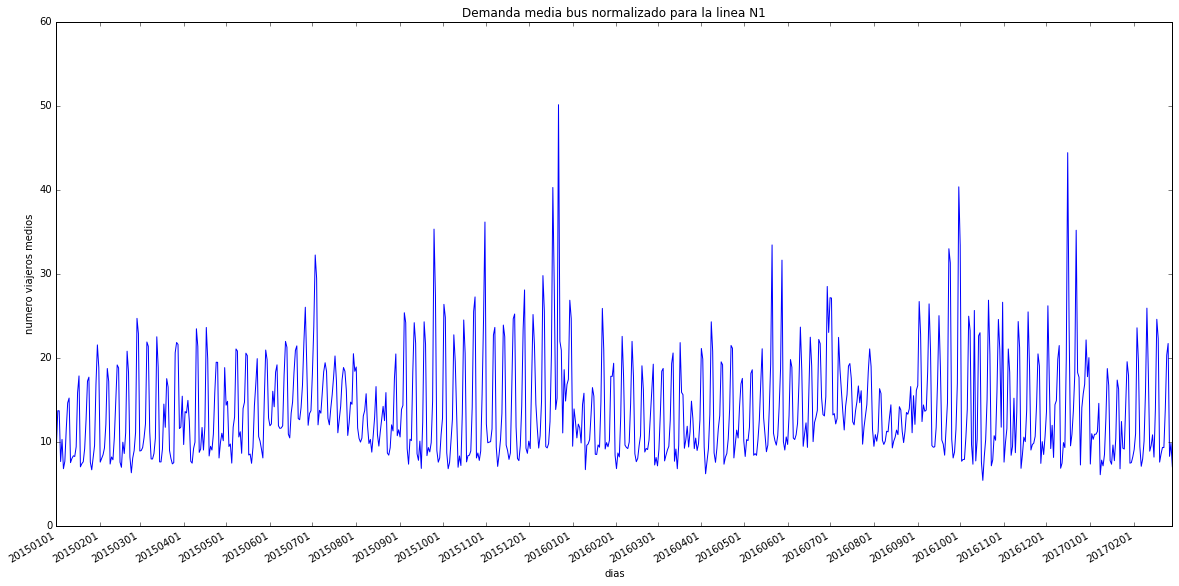

In [19]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_N1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,new_demanda_N1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus normalizado para la linea N1')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

## Estudio Demanda por Tramos

### 1. Carga de Datos

#### 1.1. Carga de Datos Linea 1

In [20]:
df_demanda_linea1_tramo1=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=1 and tramo>=0 and tramo<6 group by tramo,fecha")
df_demanda_linea1_tramo2=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=1 and tramo>=6 and tramo<12 group by tramo,fecha")
df_demanda_linea1_tramo3=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=1 and tramo>=12 and tramo<18 group by tramo,fecha")
df_demanda_linea1_tramo4=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=1 and tramo>=18 and tramo<24 group by tramo,fecha")

In [21]:
sqlCtx.registerDataFrameAsTable(df_demanda_linea1_tramo1, "temporal_demanda_linea1_tramo1")
sqlCtx.registerDataFrameAsTable(df_demanda_linea1_tramo2, "temporal_demanda_linea1_tramo2")
sqlCtx.registerDataFrameAsTable(df_demanda_linea1_tramo3, "temporal_demanda_linea1_tramo3")
sqlCtx.registerDataFrameAsTable(df_demanda_linea1_tramo4, "temporal_demanda_linea1_tramo4")

In [22]:
temporal_demanda_linea1_tramo1_tmp1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_linea1_tramo1 group by fecha ORDER BY fecha")
temporal_demanda_linea1_tramo2_tmp1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_linea1_tramo2 group by fecha ORDER BY fecha")
temporal_demanda_linea1_tramo3_tmp1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_linea1_tramo3 group by fecha ORDER BY fecha")
temporal_demanda_linea1_tramo4_tmp1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_linea1_tramo4 group by fecha ORDER BY fecha")

#### 1.1. Carga de Datos Linea N1

In [23]:
df_demanda_lineaN1_tramo1=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=501 and tramo>=0 and tramo<6 group by tramo,fecha")
df_demanda_lineaN1_tramo2=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=501 and tramo>=6 and tramo<12 group by tramo,fecha")
df_demanda_lineaN1_tramo3=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=501 and tramo>=12 and tramo<18 group by tramo,fecha")
df_demanda_lineaN1_tramo4=sqlContext.sql("select fecha,tramo,sum(viajeros) as nviajeros,count(distinct bus) as nbus,sum(viajeros)/count(distinct bus) as demanda from emt_smartbus.viajeros_sentido_master_nooutliers where linea=501 and tramo>=18 and tramo<24 group by tramo,fecha")

In [24]:
sqlCtx.registerDataFrameAsTable(df_demanda_lineaN1_tramo1, "temporal_demanda_lineaN1_tramo1")
sqlCtx.registerDataFrameAsTable(df_demanda_lineaN1_tramo2, "temporal_demanda_lineaN1_tramo2")
sqlCtx.registerDataFrameAsTable(df_demanda_lineaN1_tramo3, "temporal_demanda_lineaN1_tramo3")
sqlCtx.registerDataFrameAsTable(df_demanda_lineaN1_tramo4, "temporal_demanda_lineaN1_tramo4")

In [25]:
temporal_demanda_lineaN1_tramo1_tmp1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_lineaN1_tramo1 group by fecha ORDER BY fecha")
temporal_demanda_lineaN1_tramo2_tmp1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_lineaN1_tramo2 group by fecha ORDER BY fecha")
temporal_demanda_lineaN1_tramo3_tmp1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_lineaN1_tramo3 group by fecha ORDER BY fecha")
temporal_demanda_lineaN1_tramo4_tmp1=sqlContext.sql("select fecha,avg(nviajeros) as avg_nviajeros,avg(nbus) as avg_nbus,avg(nviajeros)/avg(nbus) as new_demanda from temporal_demanda_lineaN1_tramo4 group by fecha ORDER BY fecha")

### 2. Plot de la Demanda

#### 2.1. Plot Demanda Linea 1

#####  2.1.1. Demanda media por bus

In [26]:
# Tramo 1
f_t1 = [int(i.fecha) for i in temporal_demanda_linea1_tramo1_tmp1.select('fecha').collect()]
avg_nbus_t1 = [float(i.avg_nbus) for i in temporal_demanda_linea1_tramo1_tmp1.select('avg_nbus').collect()]
m_t1 = map(str,f_t1)

# Tramo 2
f_t2 = [int(i.fecha) for i in temporal_demanda_linea1_tramo2_tmp1.select('fecha').collect()]
avg_nbus_t2 = [float(i.avg_nbus) for i in temporal_demanda_linea1_tramo2_tmp1.select('avg_nbus').collect()]
m_t2 = map(str,f_t2)

# Tramo 3
f_t3 = [int(i.fecha) for i in temporal_demanda_linea1_tramo3_tmp1.select('fecha').collect()]
avg_nbus_t3 = [float(i.avg_nbus) for i in temporal_demanda_linea1_tramo3_tmp1.select('avg_nbus').collect()]
m_t3 = map(str,f_t3)

# Tramo 4
f_t4 = [int(i.fecha) for i in temporal_demanda_linea1_tramo4_tmp1.select('fecha').collect()]
avg_nbus_t4 = [float(i.avg_nbus) for i in temporal_demanda_linea1_tramo4_tmp1.select('avg_nbus').collect()]
m_t4 = map(str,f_t4)

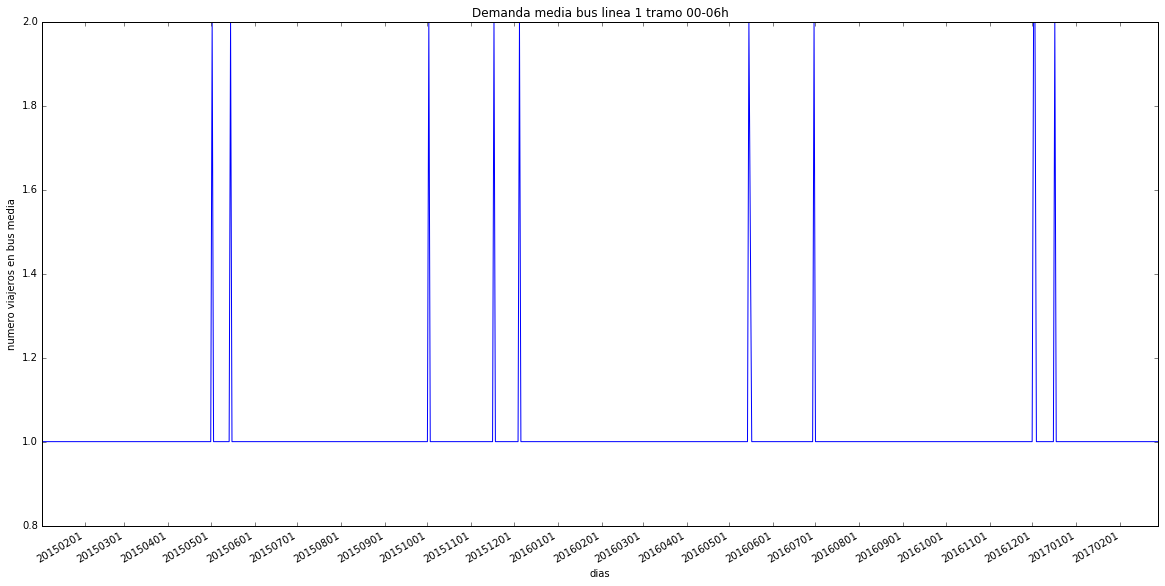

In [27]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nbus_t1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus linea 1 tramo 00-06h')

plt.xlabel('dias')
plt.ylabel('numero viajeros en bus media')

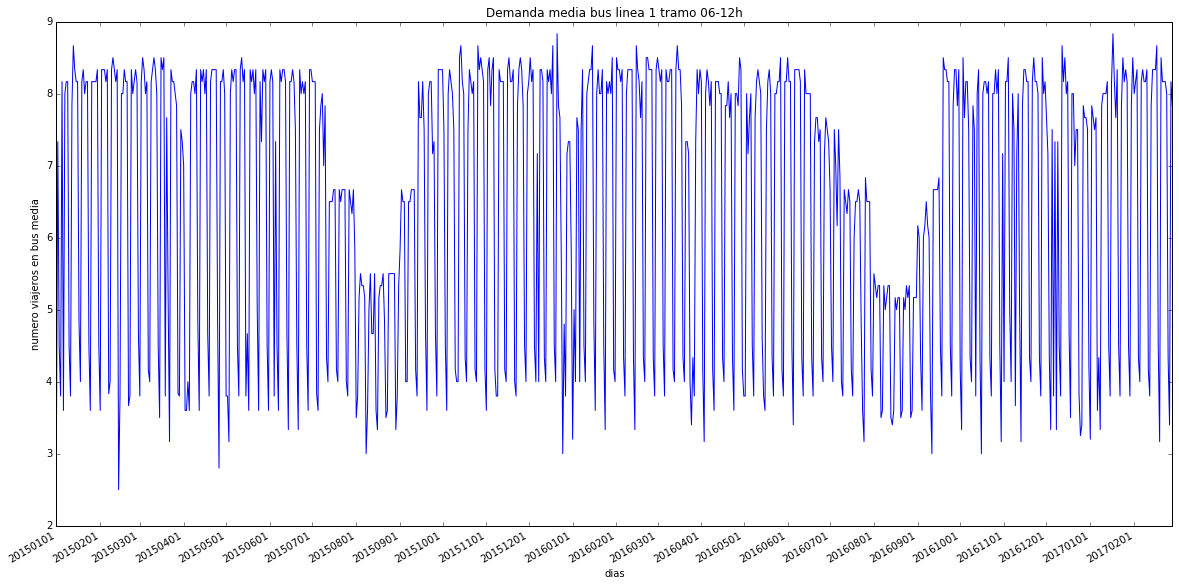

In [28]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t2]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nbus_t2)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus linea 1 tramo 06-12h')

plt.xlabel('dias')
plt.ylabel('numero viajeros en bus media')

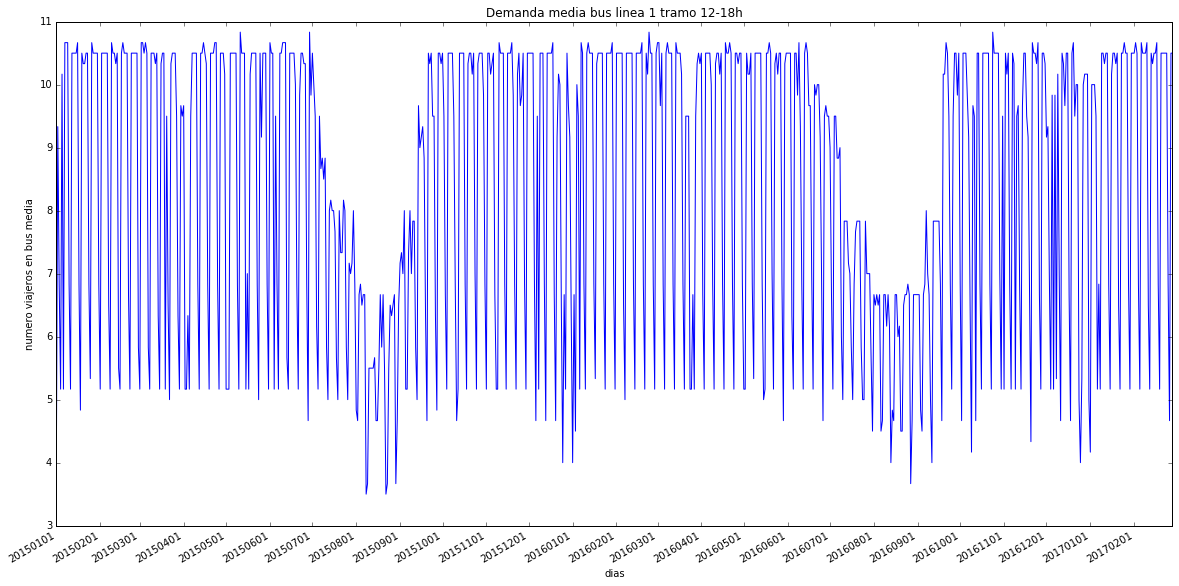

In [29]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t3]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nbus_t3)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus linea 1 tramo 12-18h')

plt.xlabel('dias')
plt.ylabel('numero viajeros en bus media')

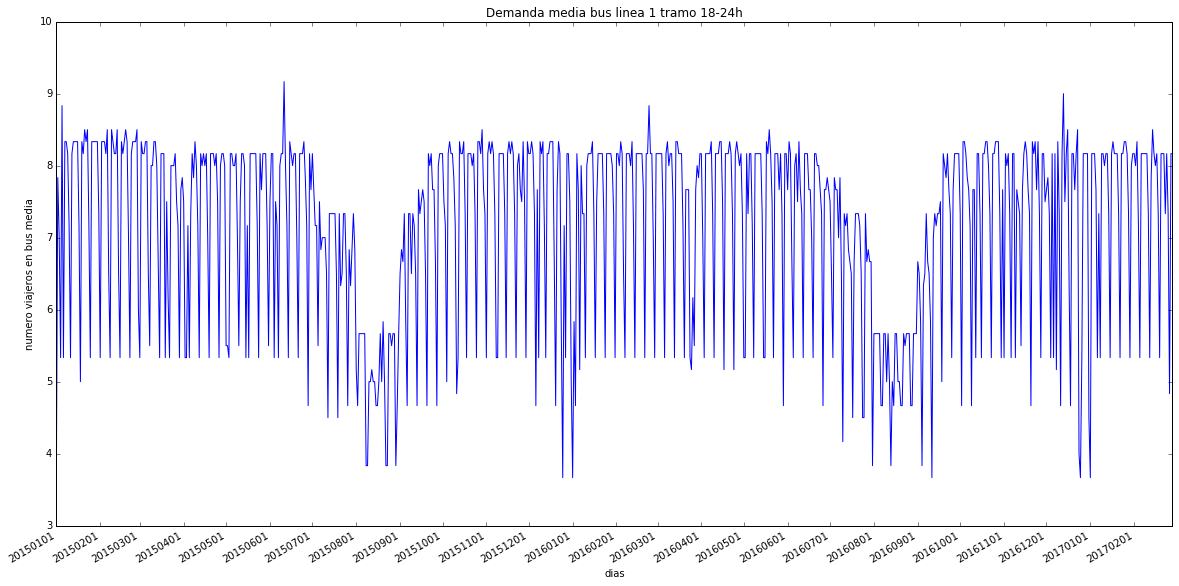

In [30]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t4]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nbus_t4)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus linea 1 tramo 18-24h')

plt.xlabel('dias')
plt.ylabel('numero viajeros en bus media')

##### 2.1.2. Demanda media de viajeros

In [31]:
# Tramo 1 y 2
avg_nviajeros_t1 = [float(i.avg_nviajeros) for i in temporal_demanda_linea1_tramo1_tmp1.select('avg_nviajeros').collect()]
avg_nviajeros_t2 = [float(i.avg_nviajeros) for i in temporal_demanda_linea1_tramo2_tmp1.select('avg_nviajeros').collect()]

# Tramo 3 y 4
avg_nviajeros_t3 = [float(i.avg_nviajeros) for i in temporal_demanda_linea1_tramo3_tmp1.select('avg_nviajeros').collect()]
avg_nviajeros_t4 = [float(i.avg_nviajeros) for i in temporal_demanda_linea1_tramo4_tmp1.select('avg_nviajeros').collect()]

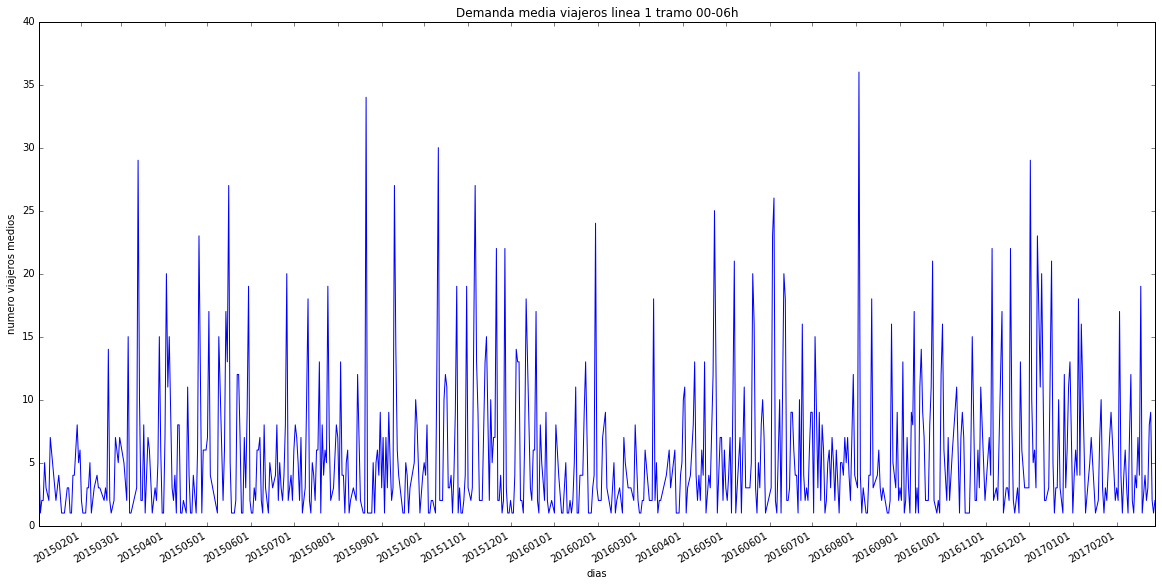

In [32]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nviajeros_t1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media viajeros linea 1 tramo 00-06h')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

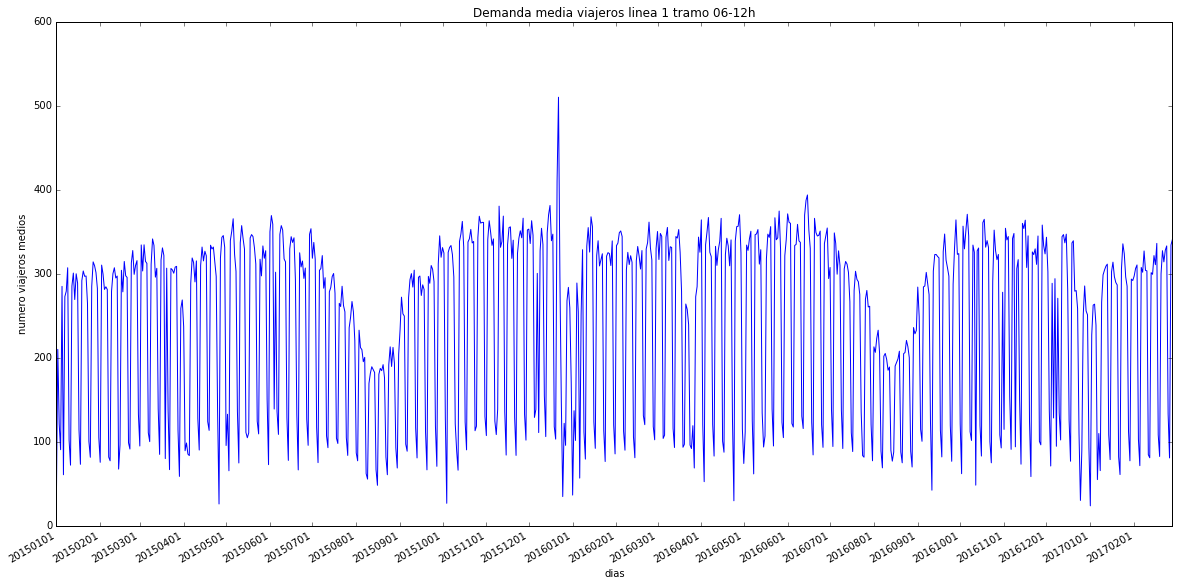

In [33]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t2]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nviajeros_t2)
plt.gcf().autofmt_xdate()
plt.title('Demanda media viajeros linea 1 tramo 06-12h')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

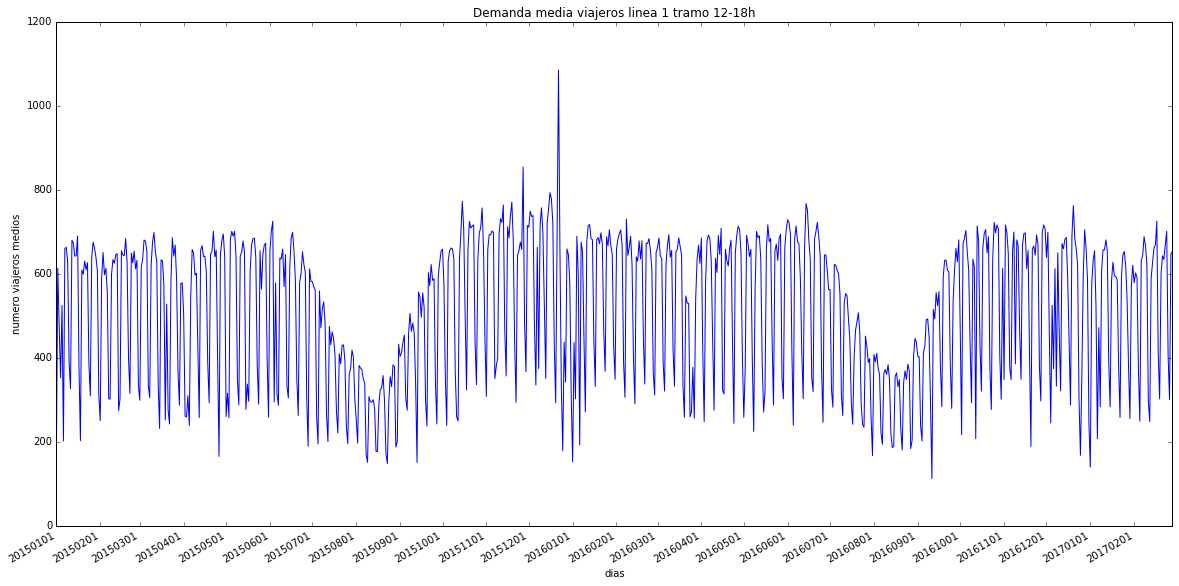

In [34]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t3]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nviajeros_t3)
plt.gcf().autofmt_xdate()
plt.title('Demanda media viajeros linea 1 tramo 12-18h')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

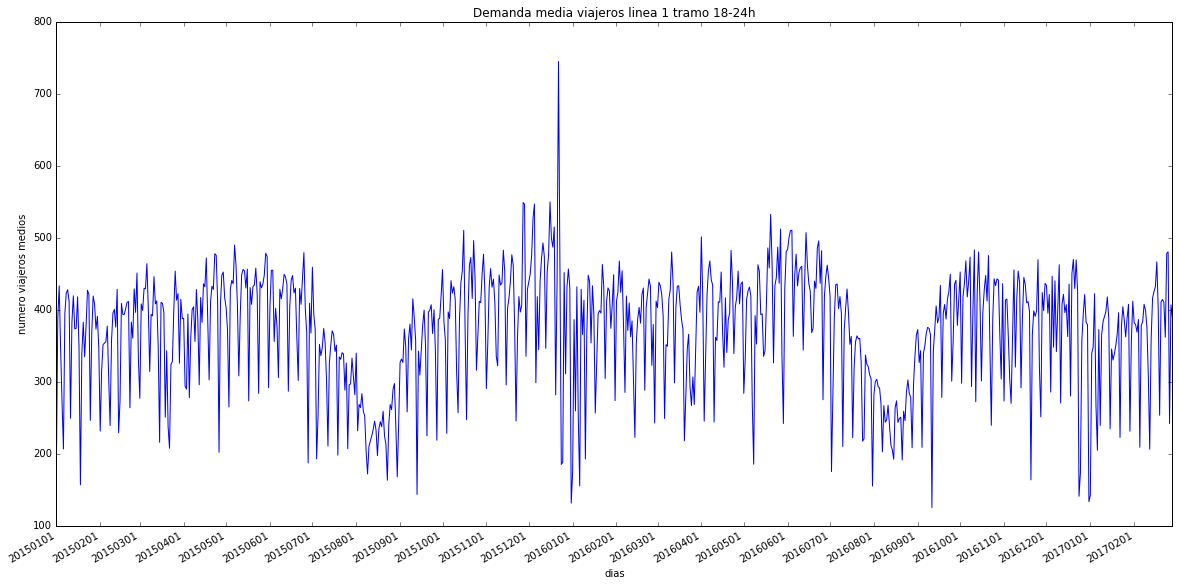

In [35]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t4]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,avg_nviajeros_t4)
plt.gcf().autofmt_xdate()
plt.title('Demanda media viajeros linea 1 tramo 18-24h')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

##### 2.1.3. Demanda media por bus normalizada

In [36]:
# Tramo 1 y 2
new_demanda_t1 = [float(i.new_demanda) for i in temporal_demanda_linea1_tramo1_tmp1.select('new_demanda').collect()]
new_demanda_t2 = [float(i.new_demanda) for i in temporal_demanda_linea1_tramo2_tmp1.select('new_demanda').collect()]

# Tramo 3 y 4
new_demanda_t3 = [float(i.new_demanda) for i in temporal_demanda_linea1_tramo3_tmp1.select('new_demanda').collect()]
new_demanda_t4 = [float(i.new_demanda) for i in temporal_demanda_linea1_tramo4_tmp1.select('new_demanda').collect()]

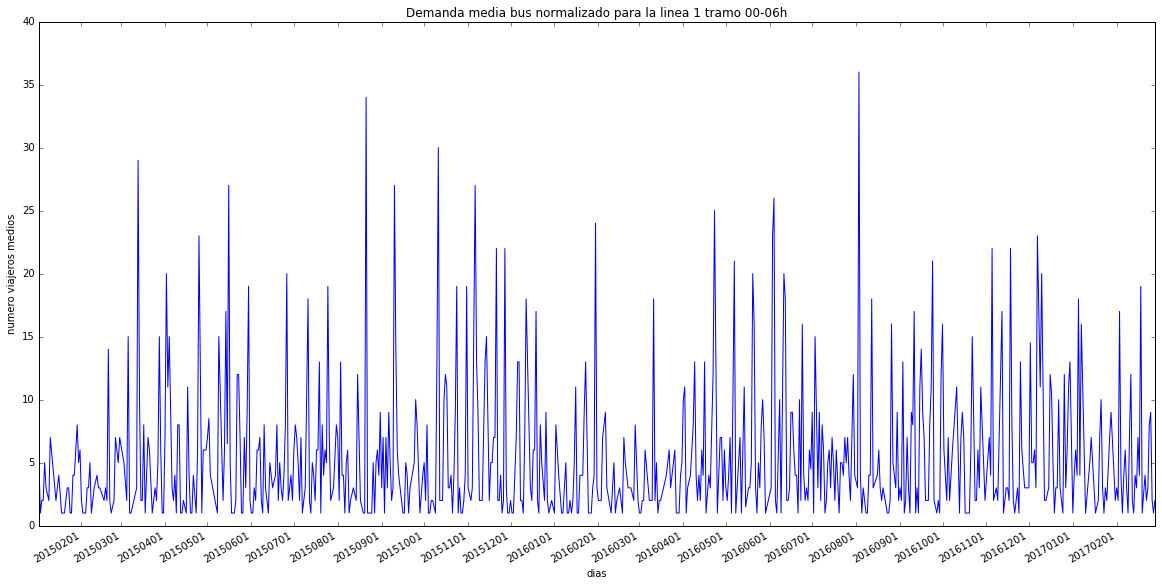

In [37]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t1]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,new_demanda_t1)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus normalizado para la linea 1 tramo 00-06h')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

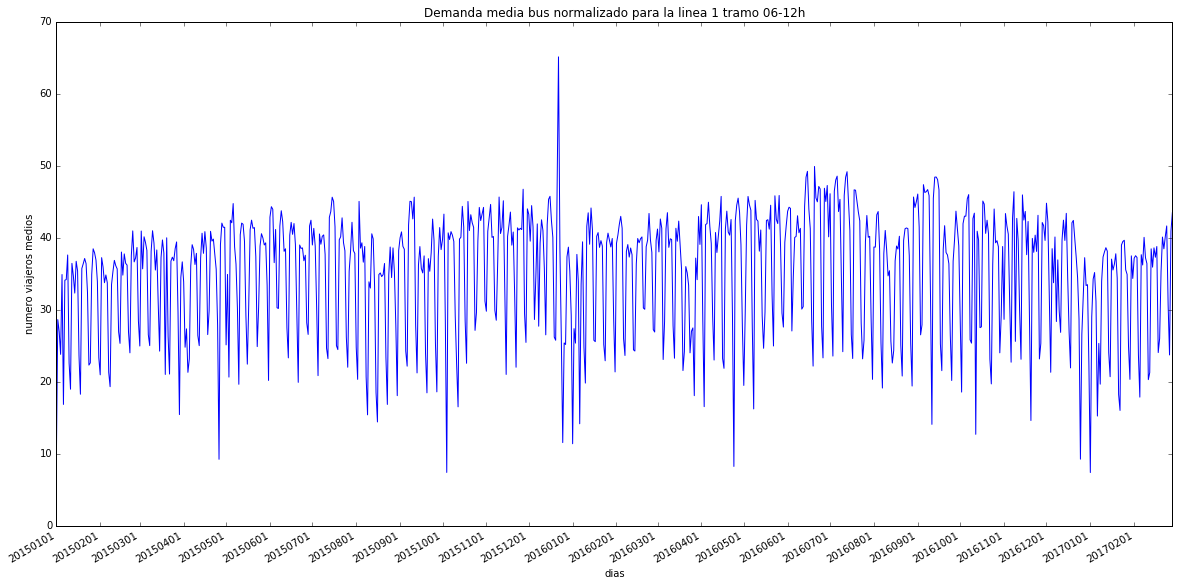

In [38]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t2]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,new_demanda_t2)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus normalizado para la linea 1 tramo 06-12h')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

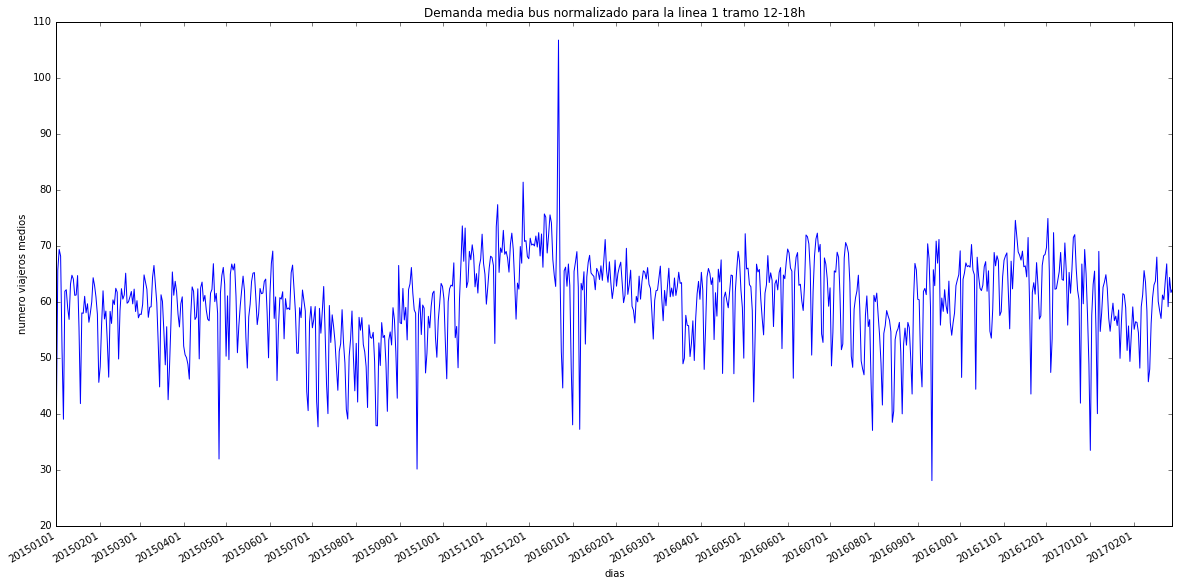

In [39]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t3]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,new_demanda_t3)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus normalizado para la linea 1 tramo 12-18h')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')

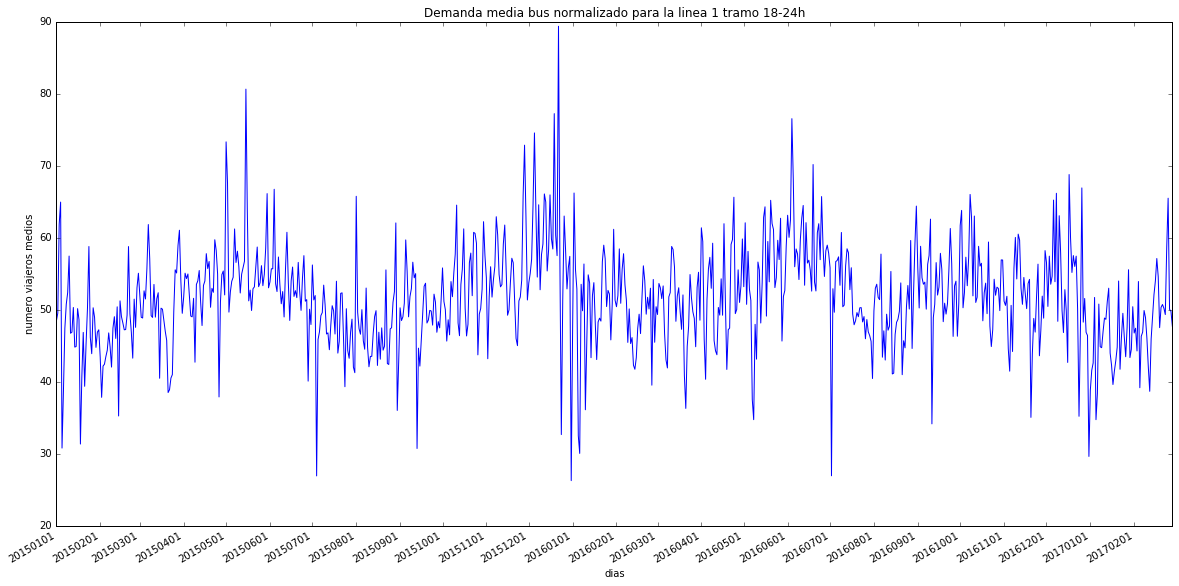

In [40]:
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in m_t4]
plt.figure(figsize=(20,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(x,new_demanda_t4)
plt.gcf().autofmt_xdate()
plt.title('Demanda media bus normalizado para la linea 1 tramo 18-24h')

plt.xlabel('dias')
plt.ylabel('numero viajeros medios')